In [ ]:
import pandas as pd
import numpy as np
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Redes/Proyecto - Octavio/Índices por país.xlsx', skiprows=[0], usecols="A:AI")

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
print(df)

   Continentes/Paises  Mujeres(%)  Hombres(%)  Discapacidad(%)  \
0              Italia       51.27       48.73             5.20   
1              España       51.00       49.00             9.00   
2             Rumania       51.60       48.40             4.00   
3            Portugal       52.80       47.20            30.50   
4               China       48.80       51.20             6.00   
5       Corea Del Sur       50.10       49.90             9.80   
6            Vietnam        51.00       49.90             7.06   
7           Filipinas       49.21       50.79             8.10   
8      Estados Unidos       50.52       49.48            26.00   
9              Brasil       51.50       48.50            23.90   
10             México       52.00       48.00            16.50   
11           Colombia       51.20       48.80             4.30   
12              Chile       50.70       49.30            17.00   
13               Perú       50.33       49.67             5.20   
14        

In [ ]:
# Estadísticas descriptivas
desc_stats = df.describe()

In [ ]:
desc_stats.to_excel('/content/drive/MyDrive/Redes/Proyecto - Octavio/estadisticas_descriptivas.xlsx')

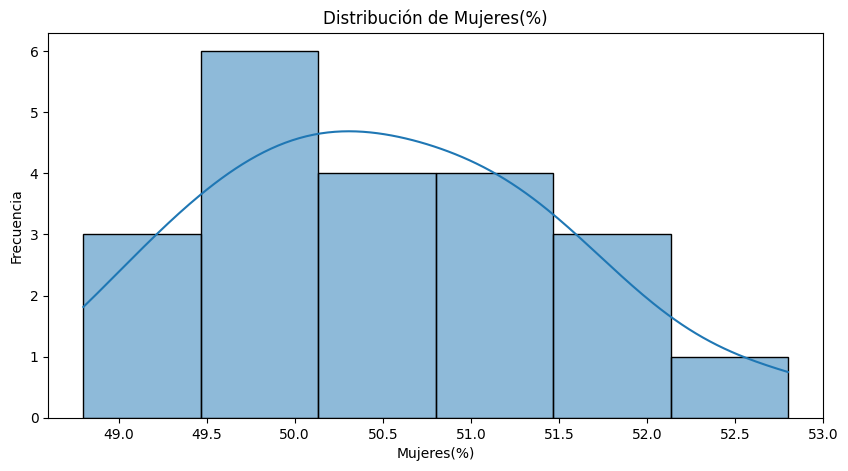

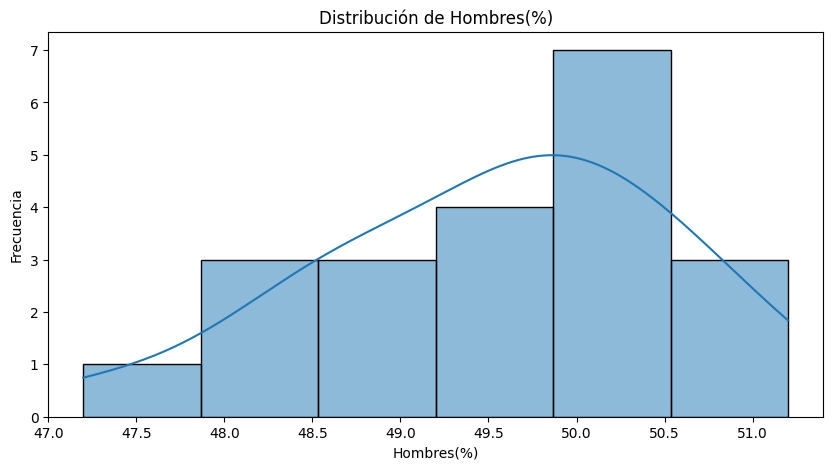

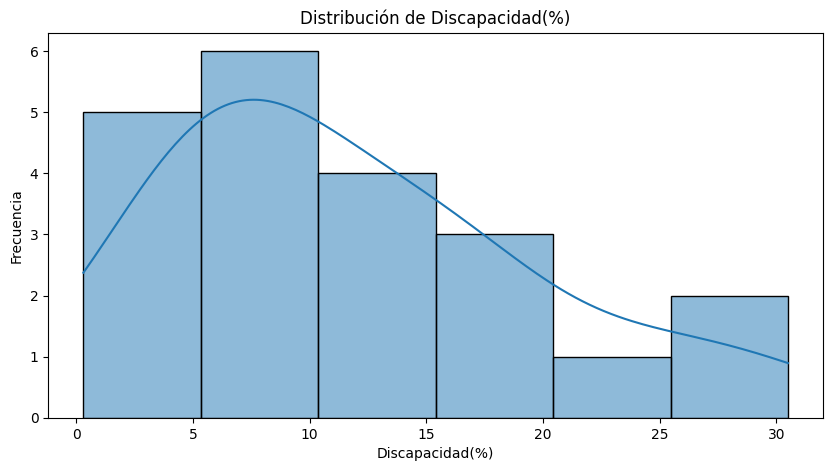

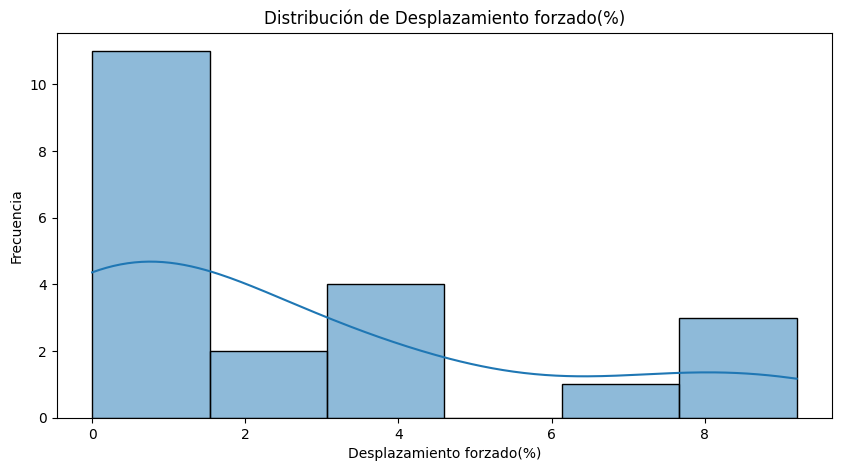

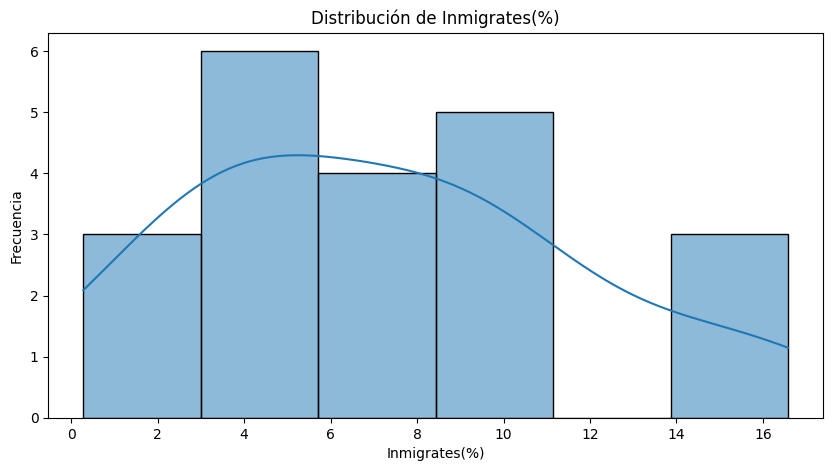

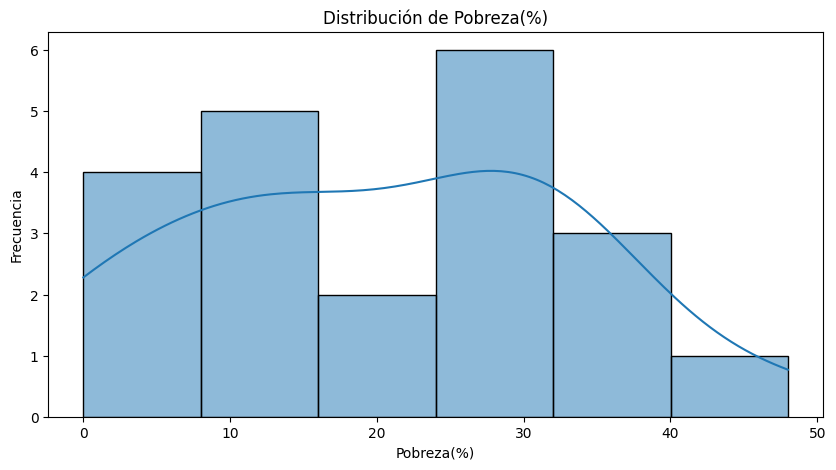

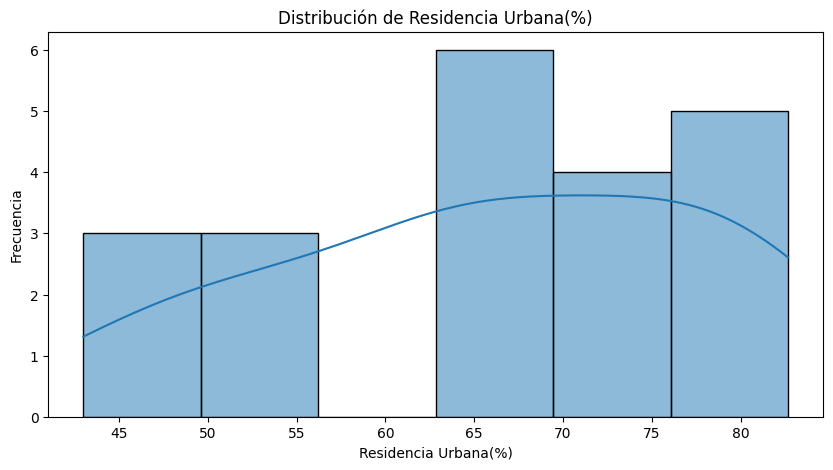

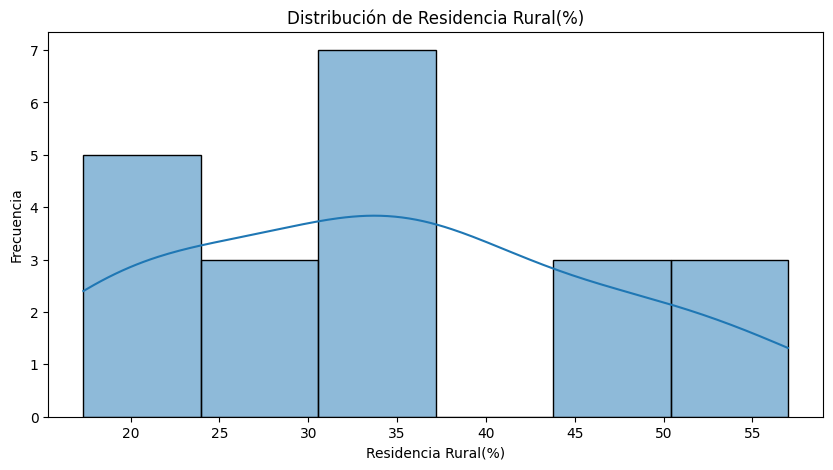

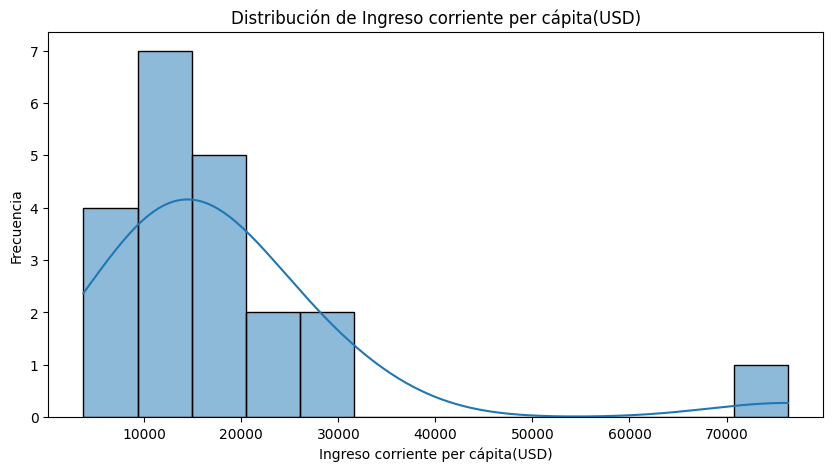

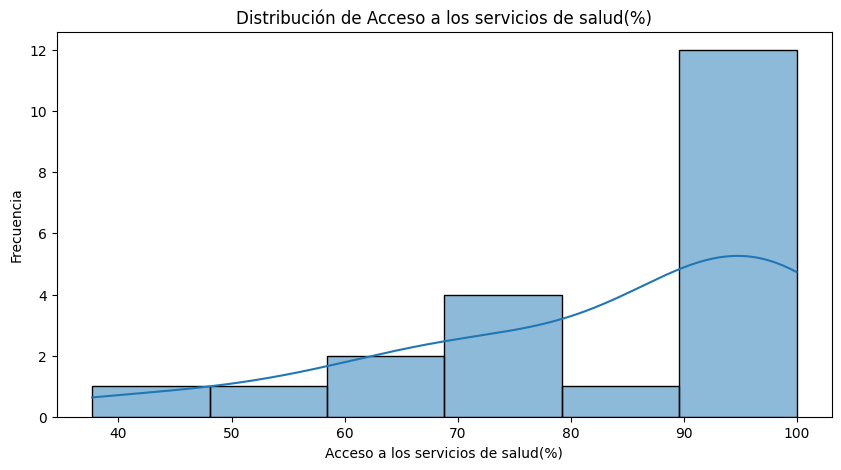

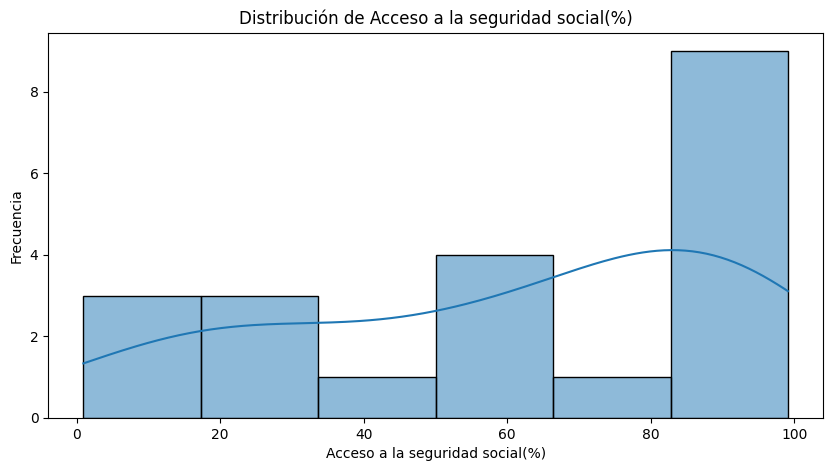

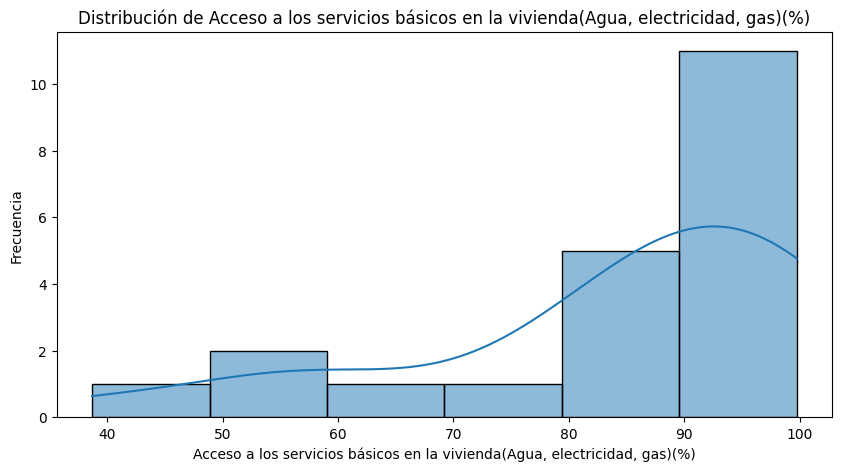

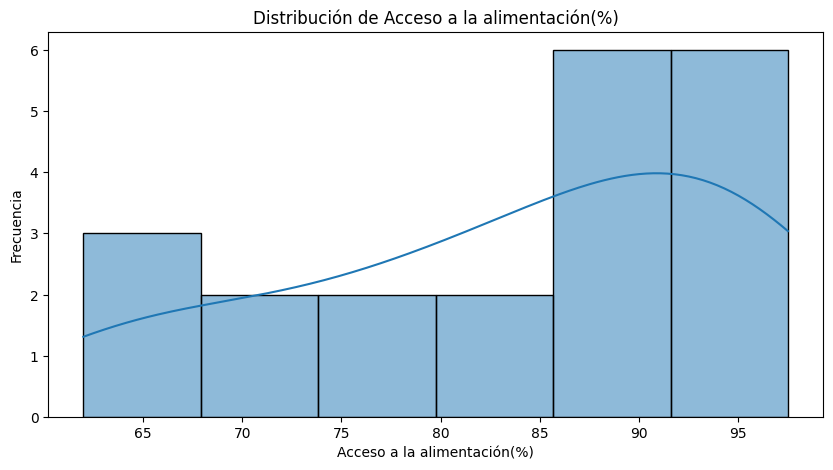

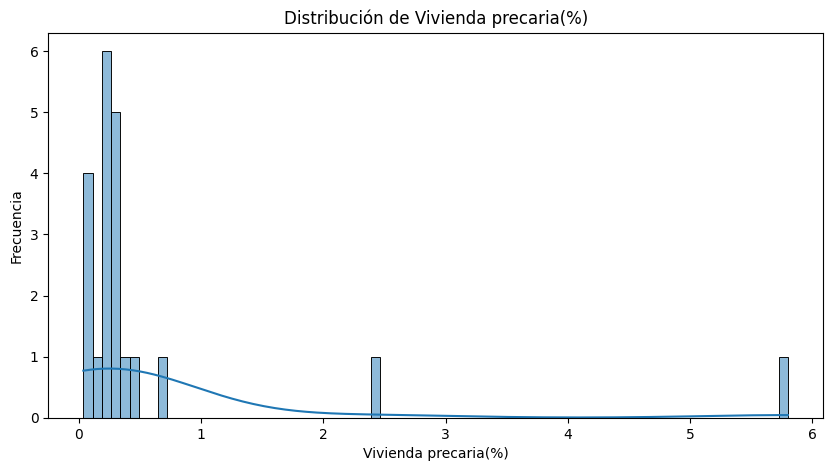

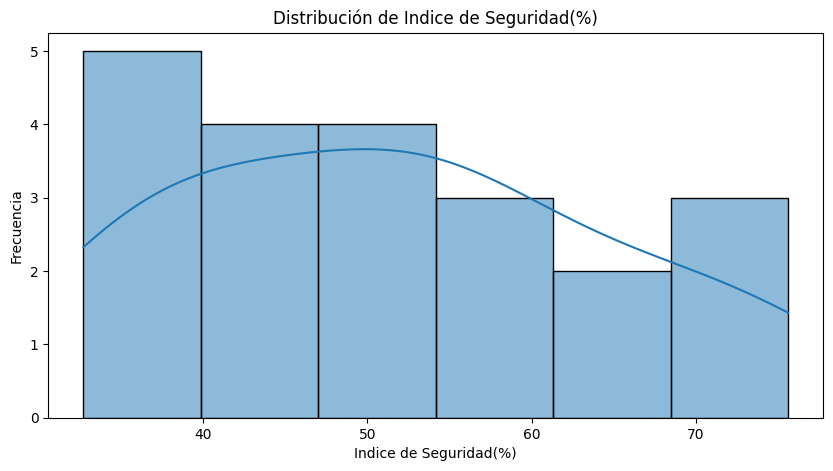

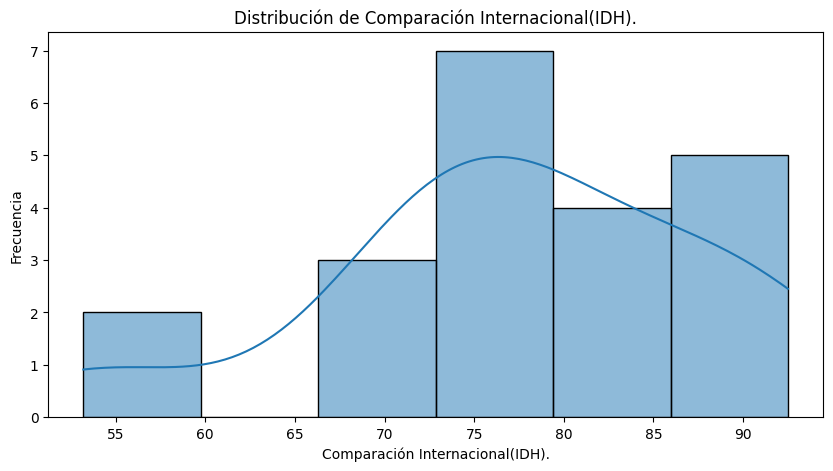

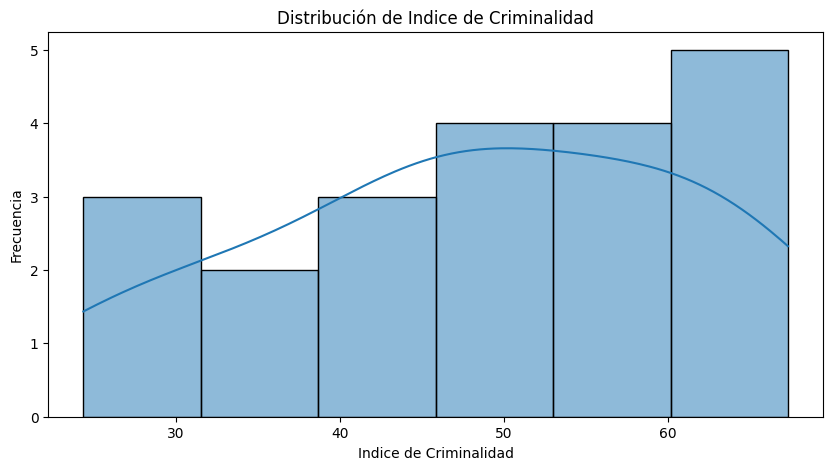

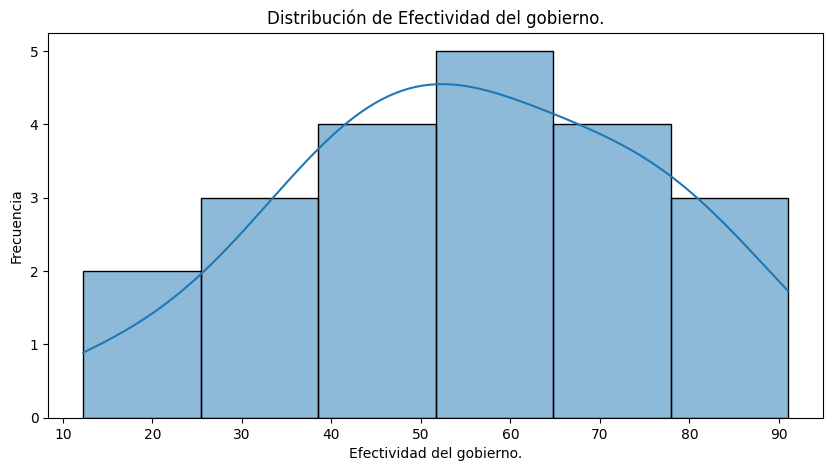

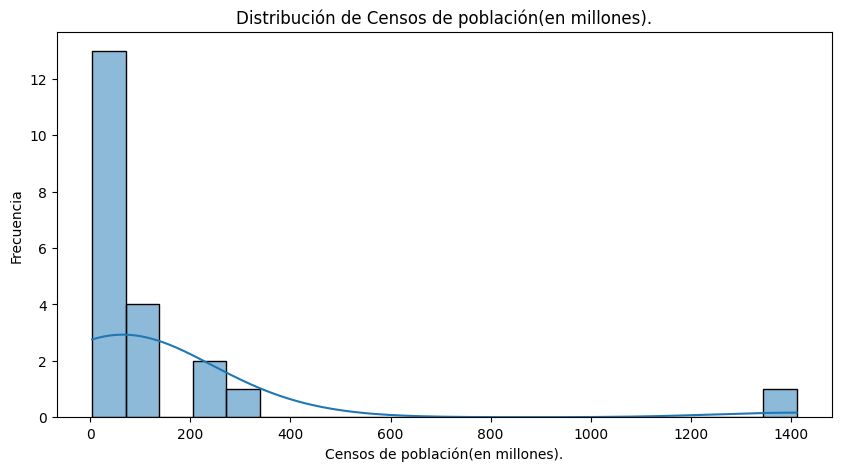

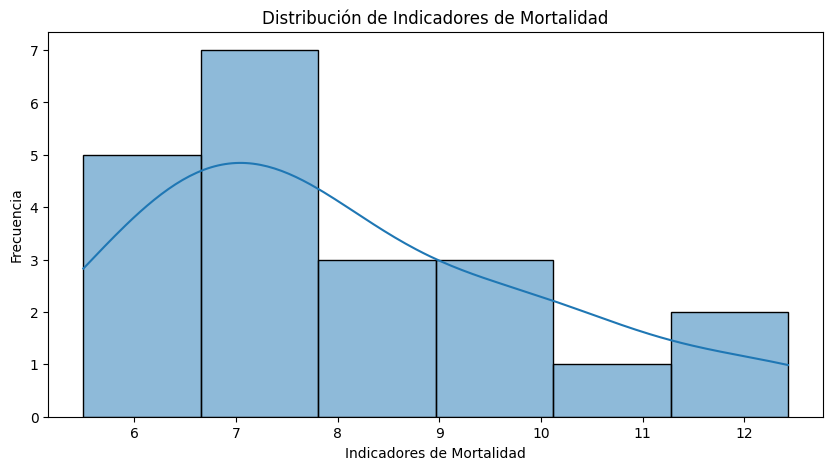

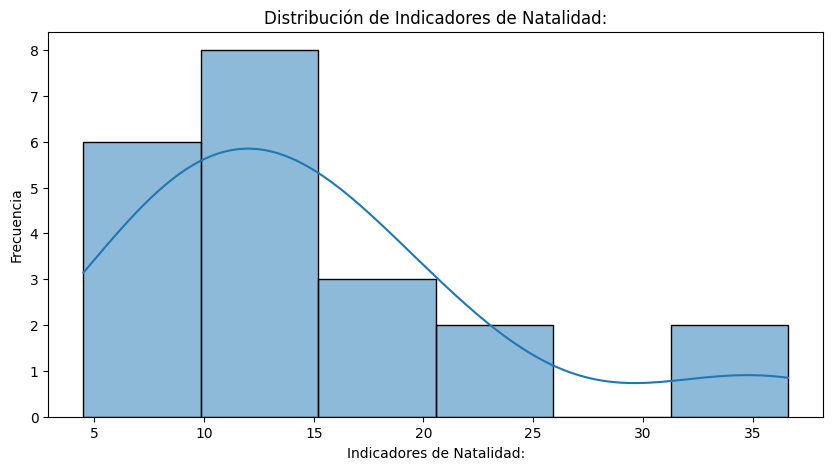

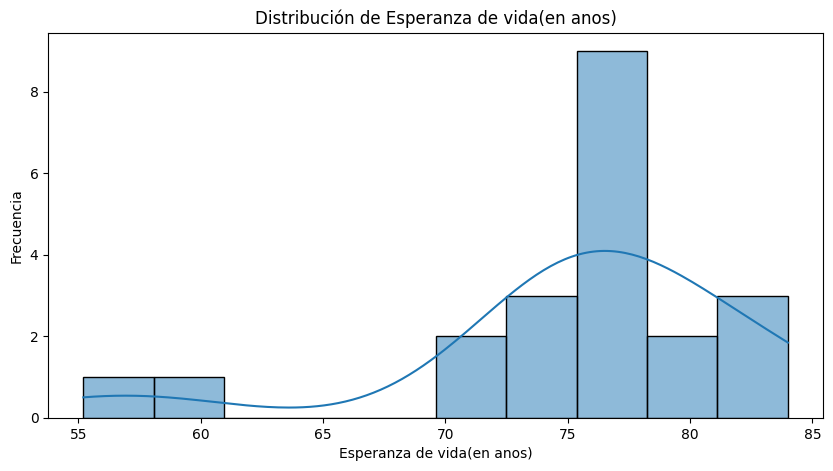

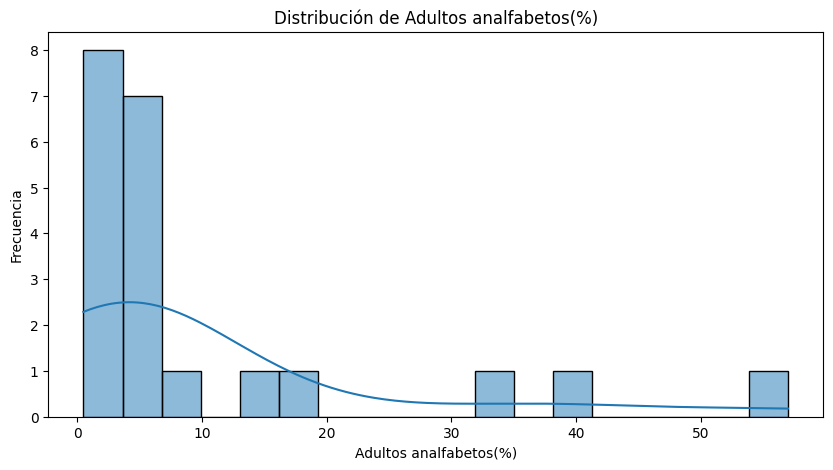

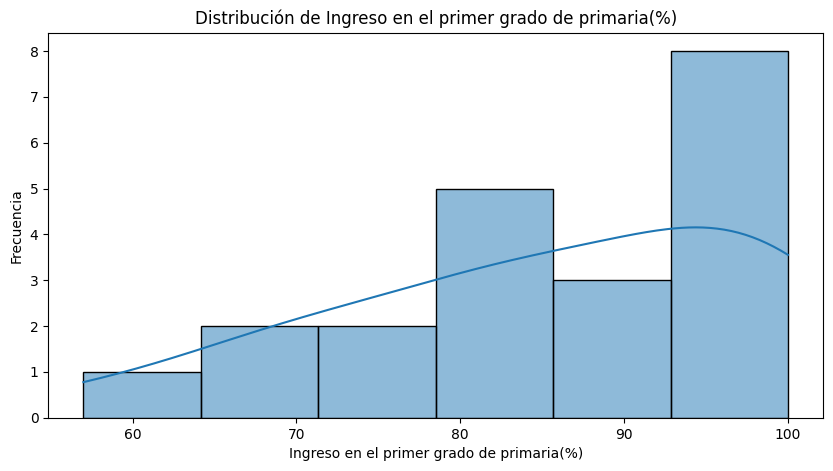

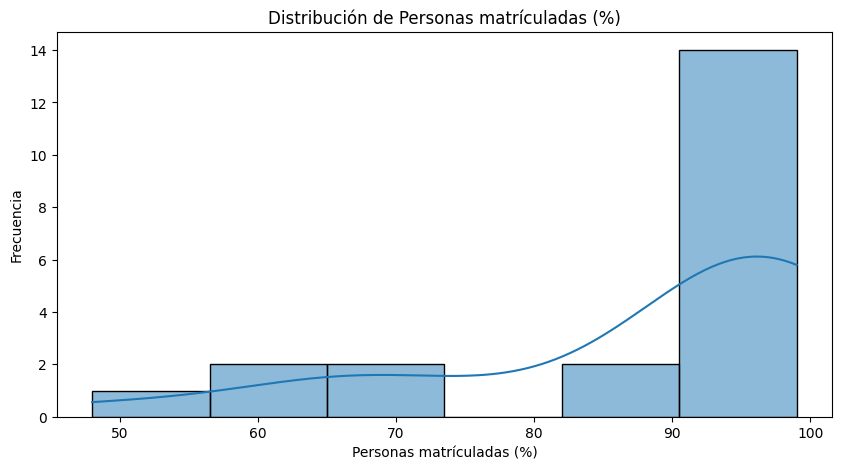

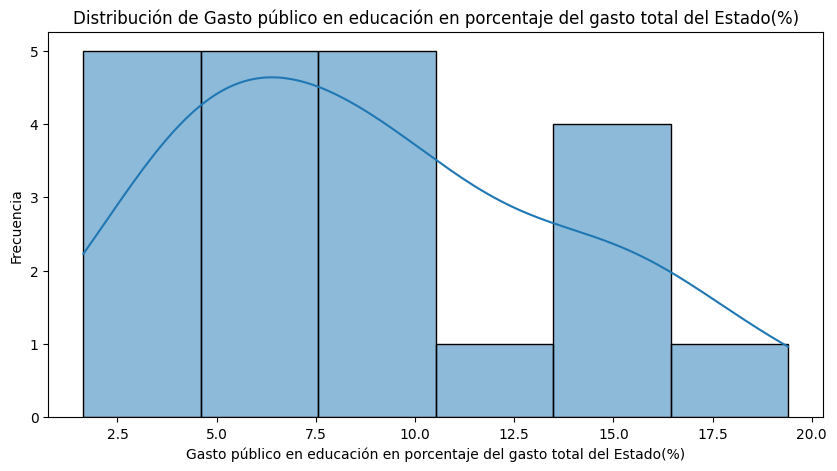

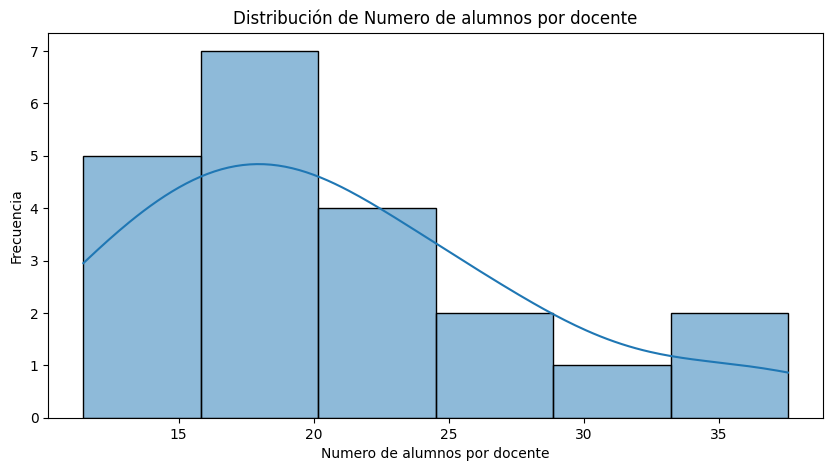

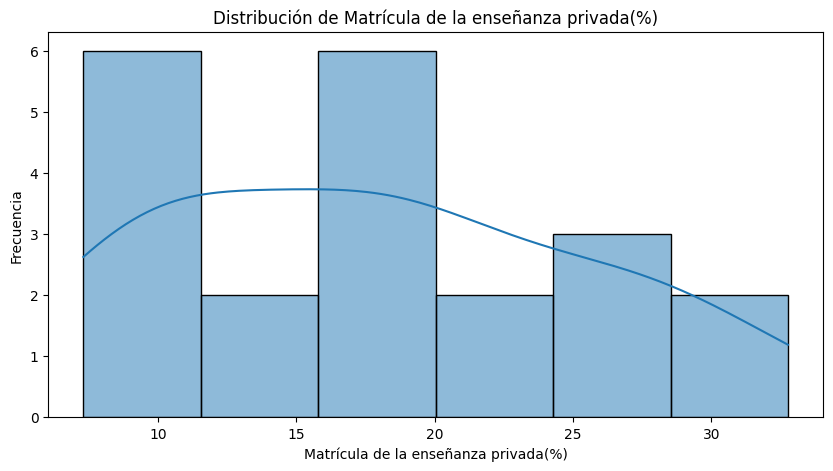

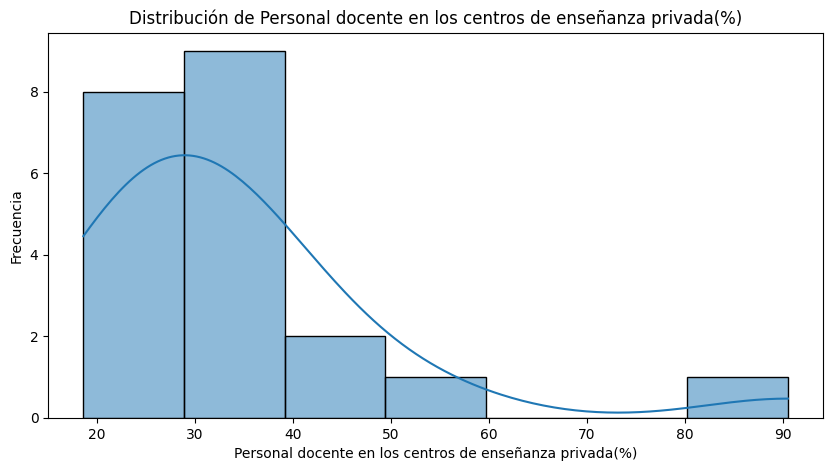

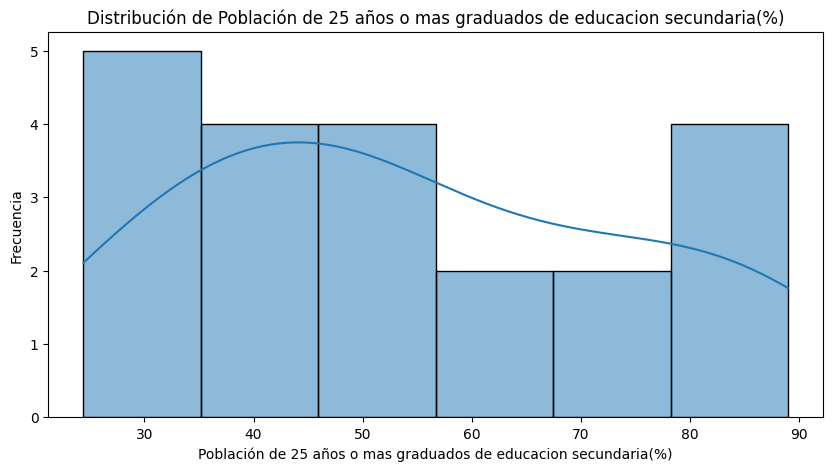

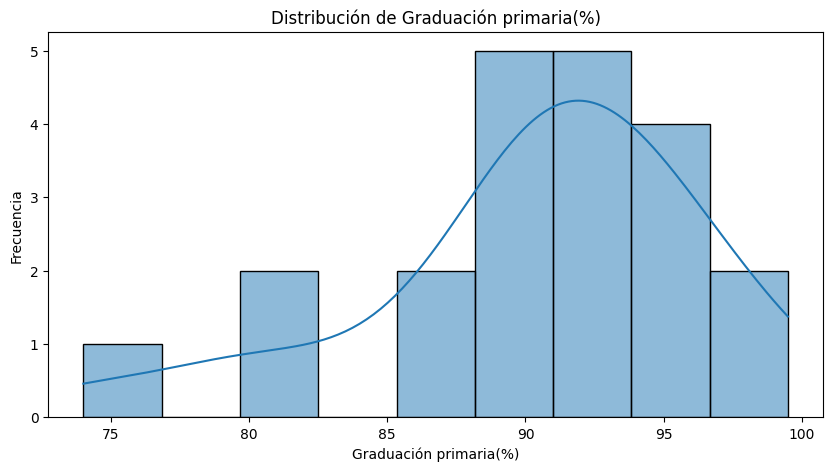

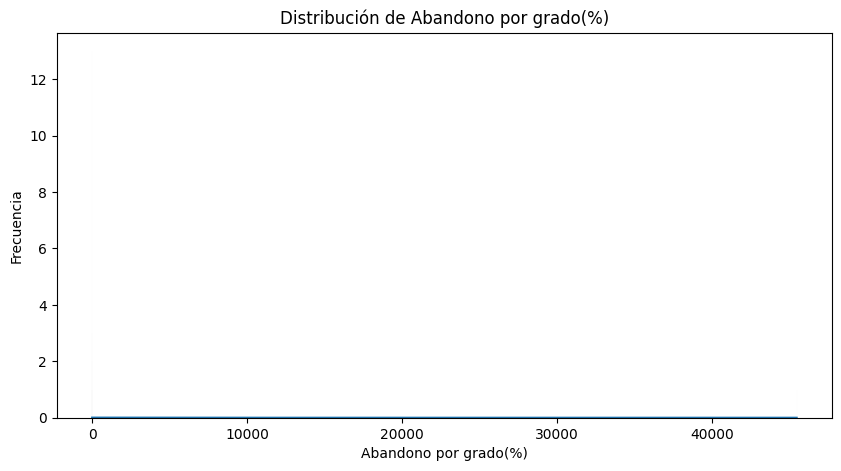

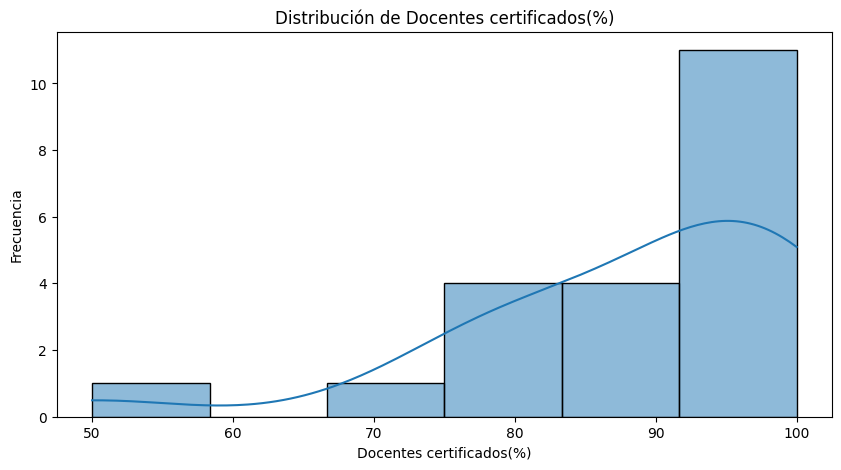

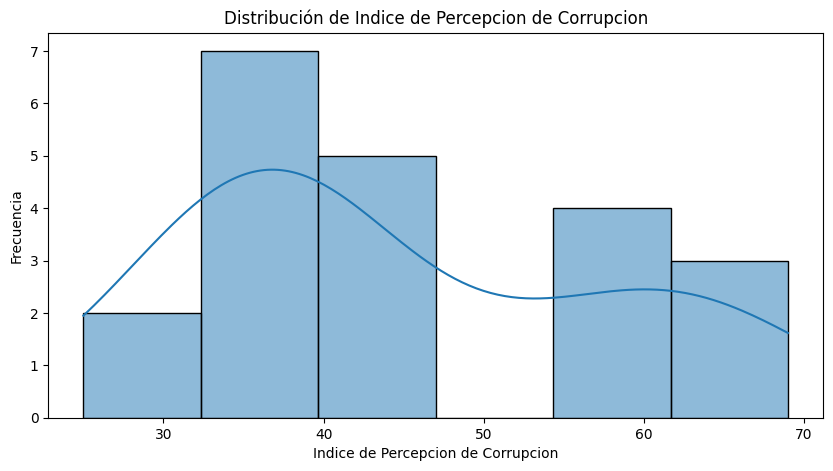

In [ ]:
# Visualización de histogramas y gráficos de densidad
for column in df.columns[1:]:  # Excluyendo la columna de países
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

In [ ]:
target_column = 'Indice de Percepcion de Corrupcion'

X = df.drop(columns=[target_column])
y = df[target_column]

# Entrenar un modelo Random Forest para evaluar la importancia de características
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Obtener la importancia de cada característica
importances = rf.feature_importances_

# Crear un DataFrame para visualizar las importancias
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Ordenar las características por importancia
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Seleccionar las características más importantes
threshold = 0.01  # Puedes ajustar este umbral según sea necesario
selected_features = feature_importances[feature_importances['Importance'] >= threshold]['Feature']

# Crear un nuevo DataFrame con solo las características seleccionadas
X_selected = X[selected_features]

print("Características seleccionadas:")
print(selected_features)

Características seleccionadas:
17                            Efectividad del gobierno.
15                      Comparación Internacional(IDH).
26                        Numero de alumnos por docente
9                    Acceso a los servicios de salud(%)
8                     Ingreso corriente per cápita(USD)
6                                  Residencia Urbana(%)
21                           Esperanza de vida(en anos)
5                                            Pobreza(%)
7                                   Residencia Rural(%)
2                                       Discapacidad(%)
11    Acceso a los servicios básicos en la vivienda(...
29    Población de 25 años o mas graduados de educac...
10                      Acceso a la seguridad social(%)
20                            Indicadores de Natalidad:
28    Personal docente en los centros de enseñanza p...
32                             Docentes certificados(%)
22                               Adultos analfabetos(%)
4                

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#X = df.drop(columns=['Indice de Percepcion de Corrupcion'])  # Primera evaluacion
X = df.drop(columns=['Indice de Percepcion de Corrupcion', "Mujeres(%)", "Hombres(%)", "Desplazamiento forzado(%)", "Acceso a la alimentación(%)", "Vivienda precaria(%)", "Indice de Seguridad(%)", "Indice de Criminalidad", "Censos de población(en millones).", "Indicadores de Mortalidad", "Ingreso en el primer grado de primaria(%)", "Personas matrículadas (%)", "Gasto público en educación en porcentaje del gasto total del Estado(%)", "Matrícula de la enseñanza privada(%)", "Graduación primaria(%)", "Abandono por grado(%)",  ])  # Segunda evaluacion
y = df['Indice de Percepcion de Corrupcion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Crear los modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR()
}

# Entrenar y evaluar cada modelo
results = {}
for name, model in models.items():
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_mse = -cv_scores.mean()
    cv_rmse = np.sqrt(cv_mse)

    # Entrenar el modelo con el conjunto de entrenamiento
    model.fit(X_train, y_train)

    # Predecir los valores de CPI en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular el MSE y R^2 en el conjunto de prueba
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_pred)

    # Guardar los resultados
    results[name] = {
        'Cross-Validated MSE': cv_mse,
        'Cross-Validated RMSE': cv_rmse,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test R^2': test_r2
    }

# Mostrar los resultados
results_df = pd.DataFrame(results).T
print(results_df)


                        Cross-Validated MSE  Cross-Validated RMSE  \
Linear Regression                445.158678             21.098784   
Random Forest                     70.728885              8.410047   
Support Vector Machine           126.932564             11.266435   

                           Test MSE  Test RMSE  Test R^2  
Linear Regression       1337.075529  36.566043 -6.755291  
Random Forest             33.272400   5.768223  0.807014  
Support Vector Machine   261.220881  16.162329 -0.515131  


In [ ]:
# Visualizar los resultados predichos vs reales para el mejor modelo (según RMSE)
best_model_name = results_df['Test RMSE'].idxmin()
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

print(best_model_name)

Linear Regression


In [ ]:
import seaborn as sns
from scipy import stats
selected_countries = ["Colombia", "Rumania", "China", "Vietnam", "Brasil", "Ecuador", "Panama", "Marruecos", "Costa de Marfil"]  # Reemplaza con los nombres reales
df_filtered = df[df['Continentes/Paises'].isin(selected_countries)]

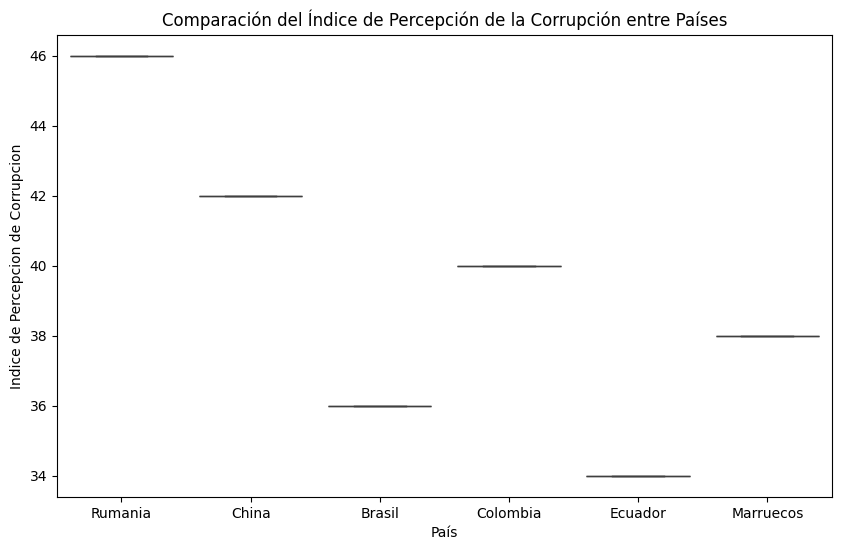

In [ ]:
# Visualización de los resultados
plt.figure(figsize=(10, 6))
sns.boxplot(x='Continentes/Paises', y='Indice de Percepcion de Corrupcion', data=df_filtered)
plt.title('Comparación del Índice de Percepción de la Corrupción entre Países')
plt.ylabel('Indice de Percepcion de Corrupcion')
plt.xlabel('País')
plt.show()

In [ ]:
Colombia-40
Rumania-46
China-42
Vietnam-41
Brasil-36
Ecuador-34
Panama-35
Marruecos-38
Costa de Marfil-40

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
# Asegurarse de que los nombres de los países estén en la columna 'Country'
countries = df['Continentes/Paises']
indicators = [
    'Efectividad del gobierno.', 'Comparación Internacional(IDH).', 'Numero de alumnos por docente',  # Reemplaza con los nombres reales de los indicadores que deseas usar
    'Acceso a los servicios de salud(%)', 'Ingreso corriente per cápita(USD)', 'Residencia Urbana(%)', 'Esperanza de vida(en anos)', 'Pobreza(%)', 'Residencia Rural(%)', 'Discapacidad(%)', 'Acceso a los servicios básicos en la vivienda(Agua, electricidad, gas)(%)', 'Población de 25 años o mas graduados de educacion secundaria(%)', 'Acceso a la seguridad social(%)', 'Indicadores de Natalidad:', 'Personal docente en los centros de enseñanza privada(%)'
]

# Normalizar los datos (excepto la columna de los países)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[indicators] = scaler.fit_transform(df[indicators])

# Extraer los datos de Colombia
colombia_data = df_scaled[df_scaled['Continentes/Paises'] == 'Colombia'].iloc[0][indicators]

# Calcular la distancia euclidiana entre Colombia y todos los demás países
distances = {}
for idx, row in df_scaled.iterrows():
    if row['Continentes/Paises'] != 'Colombia':
        distances[row['Continentes/Paises']] = euclidean(colombia_data, row[indicators])

# Encontrar el país con la menor distancia
most_similar_country = min(distances, key=distances.get)
print(f"El país más parecido a Colombia en términos de los indicadores seleccionados es: {most_similar_country}")

El país más parecido a Colombia en términos de los indicadores seleccionados es: Panamá


In [ ]:
for country, distance in distances.items():
    print(f"Distancia a {country}: {distance:.2f}")

Distancia a Italia: 7.80
Distancia a España: 7.89
Distancia a Rumania: 6.82
Distancia a Portugal: 8.66
Distancia a China: 11.09
Distancia a Corea Del Sur: 9.23
Distancia a Vietnam : 7.95
Distancia a Filipinas: 7.47
Distancia a Estados Unidos: 10.30
Distancia a Brasil: 6.73
Distancia a México: 6.61
Distancia a Chile: 7.04
Distancia a Perú: 6.55
Distancia a Ecuador: 5.38
Distancia a Panamá: 4.89
Distancia a Costa-Rica: 6.62
Distancia a Egipto: 8.92
Distancia a Nigeria: 11.09
Distancia a Marruecos: 7.88
Distancia a Costa De Marfil: 9.50


In [ ]:
for country, distance in distances.items():
    print(f"Distancia a {country}: {distance:.2f}")

Distancia a Italia: 4.73
Distancia a España: 4.48
Distancia a Rumania: 3.85
Distancia a Portugal: 5.38
Distancia a China: 6.81
Distancia a Corea Del Sur: 5.51
Distancia a Vietnam : 5.12
Distancia a Filipinas: 5.00
Distancia a Estados Unidos: 7.39
Distancia a Brasil: 4.53
Distancia a México: 4.40
Distancia a Chile: 4.42
Distancia a Perú: 3.78
Distancia a Ecuador: 2.71
Distancia a Panamá: 2.46
Distancia a Costa-Rica: 3.49
Distancia a Egipto: 5.88
Distancia a Nigeria: 7.18
Distancia a Marruecos: 4.00
Distancia a Costa De Marfil: 6.22


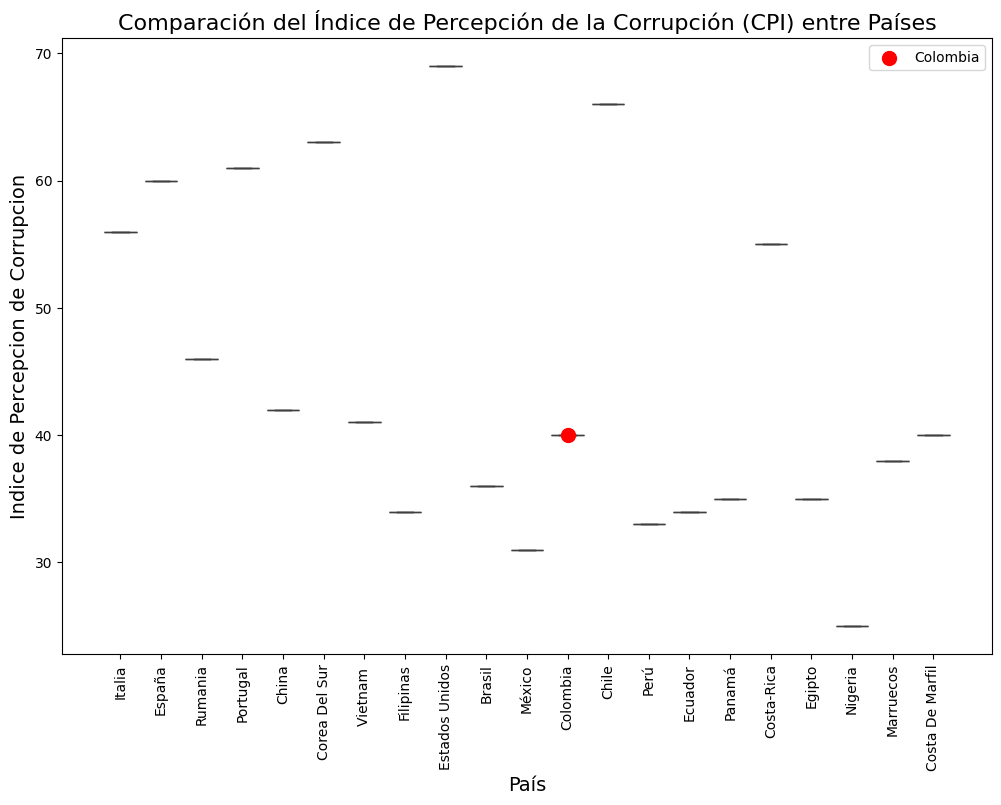

In [ ]:
cpi_column = 'Indice de Percepcion de Corrupcion'  # Reemplaza con el nombre correcto de la columna del CPI
country_column = 'Continentes/Paises'  # Reemplaza con el nombre correcto de la columna de los países

# Crear la figura del boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x=country_column, y=cpi_column, data=df)

# Resaltar a Colombia
colombia_cpi = df[df[country_column] == 'Colombia'][cpi_column].values[0]
plt.scatter(df[df[country_column] == 'Colombia'].index, [colombia_cpi], color='red', s=100, zorder=5, label='Colombia')

# Añadir etiquetas y título
plt.title('Comparación del Índice de Percepción de la Corrupción (CPI) entre Países', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('Indice de Percepcion de Corrupcion', fontsize=14)
plt.xticks(rotation=90)
plt.legend()

# Mostrar la gráfica
plt.show()